## Heart Failure Prediction Dataset

11 clinical features for predicting heart disease events.

Attribute Information:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.  

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.  

#### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
heart = pd.read_csv('heart.csv')
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
for i in heart.columns:
    print(i)
    print(heart[i].unique())
    print(len(heart[i].unique()))
    print('-'*50)

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
50
--------------------------------------------------
Sex
['M' 'F']
2
--------------------------------------------------
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
4
--------------------------------------------------
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
67
--------------------------------------------------
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 

In [6]:
display(heart.query('RestingBP==0'))
display(heart.query('Cholesterol==0'))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


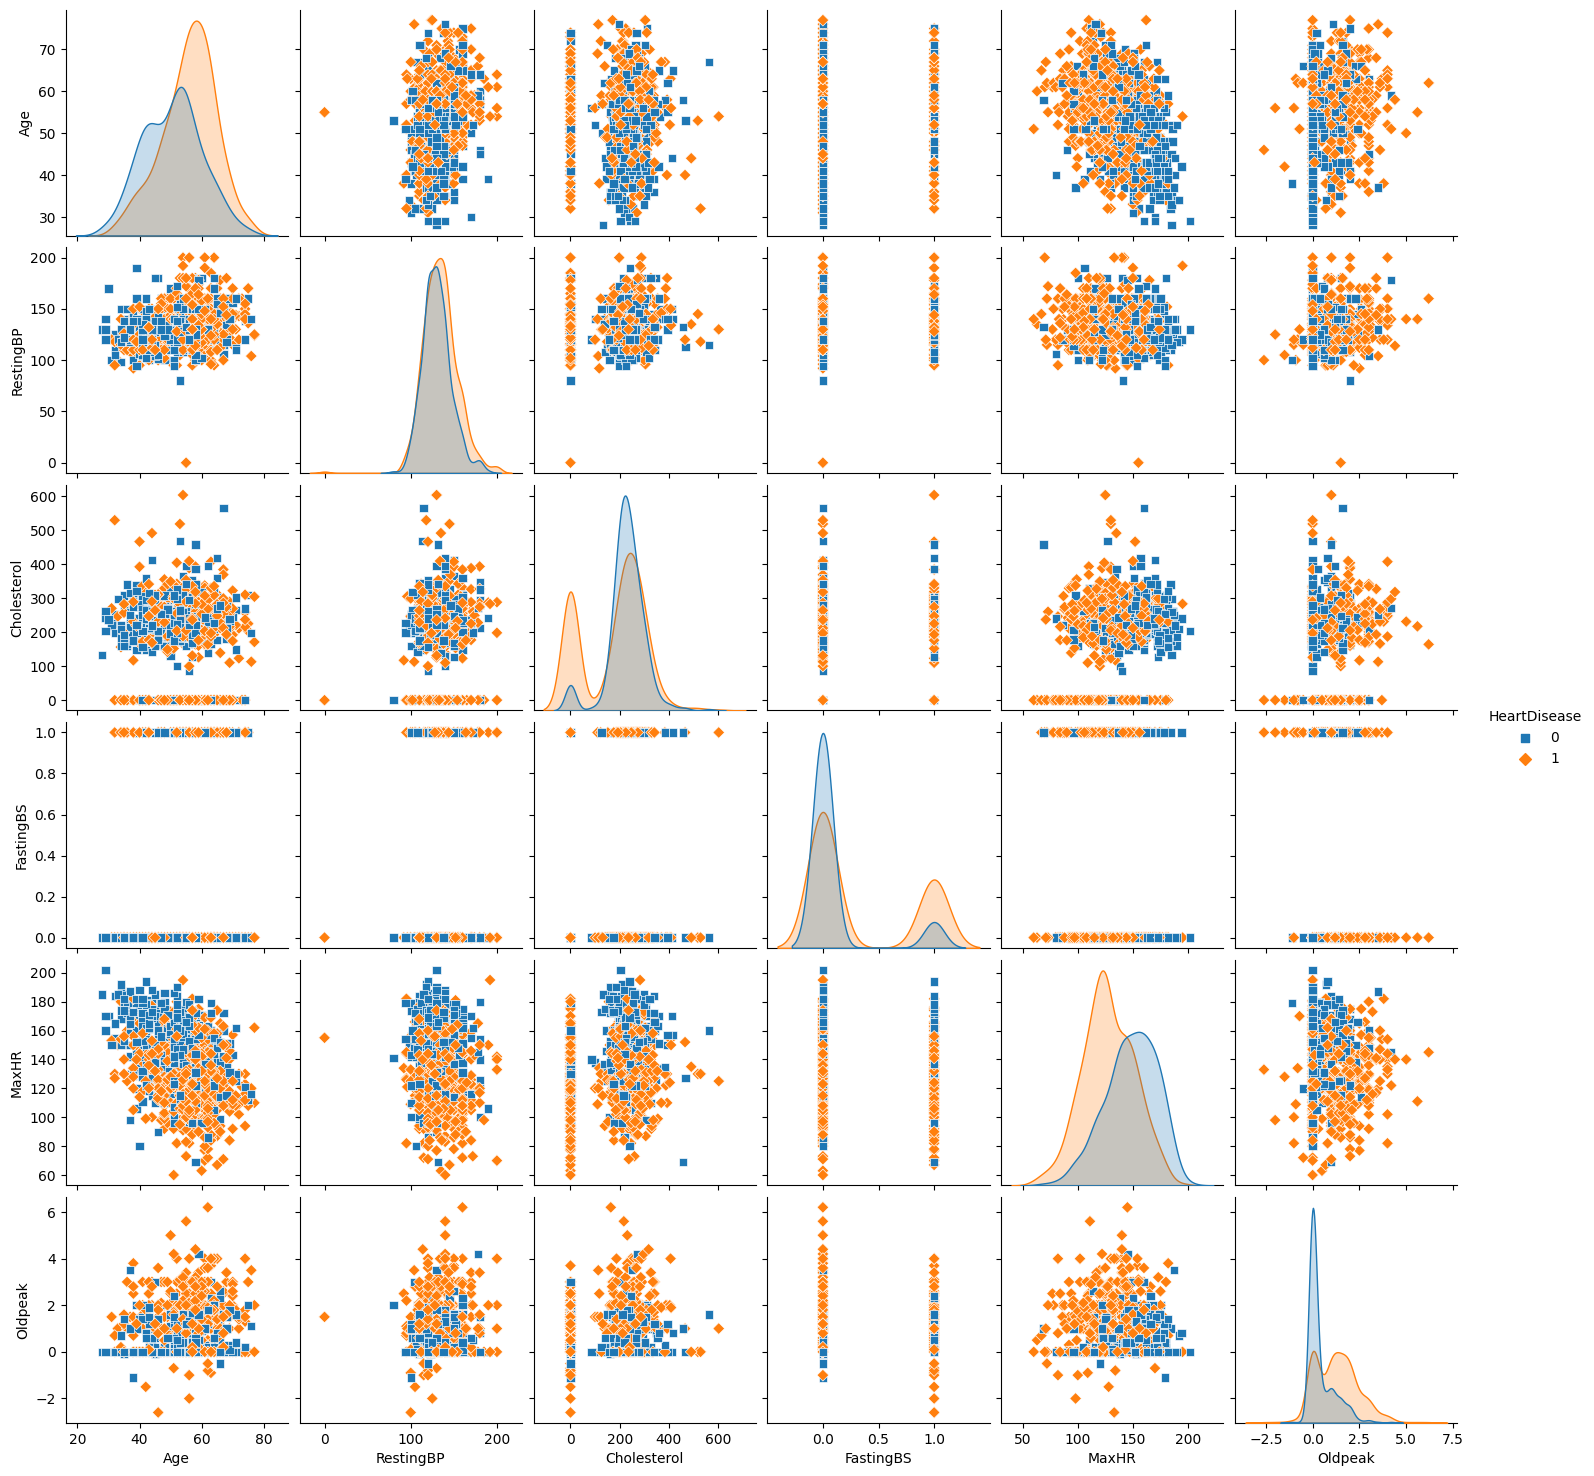

In [7]:
sns.pairplot(data=heart, hue='HeartDisease', markers=['s','D'])

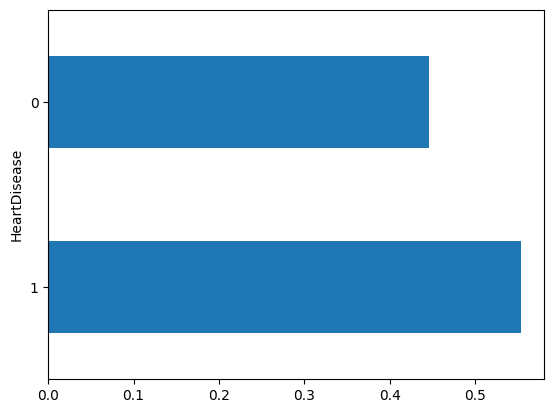

In [8]:
heart['HeartDisease'].value_counts(normalize=True).plot.barh()
plt.show()

In [9]:
heart = pd.get_dummies(heart, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True, dtype=int)

In [10]:
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


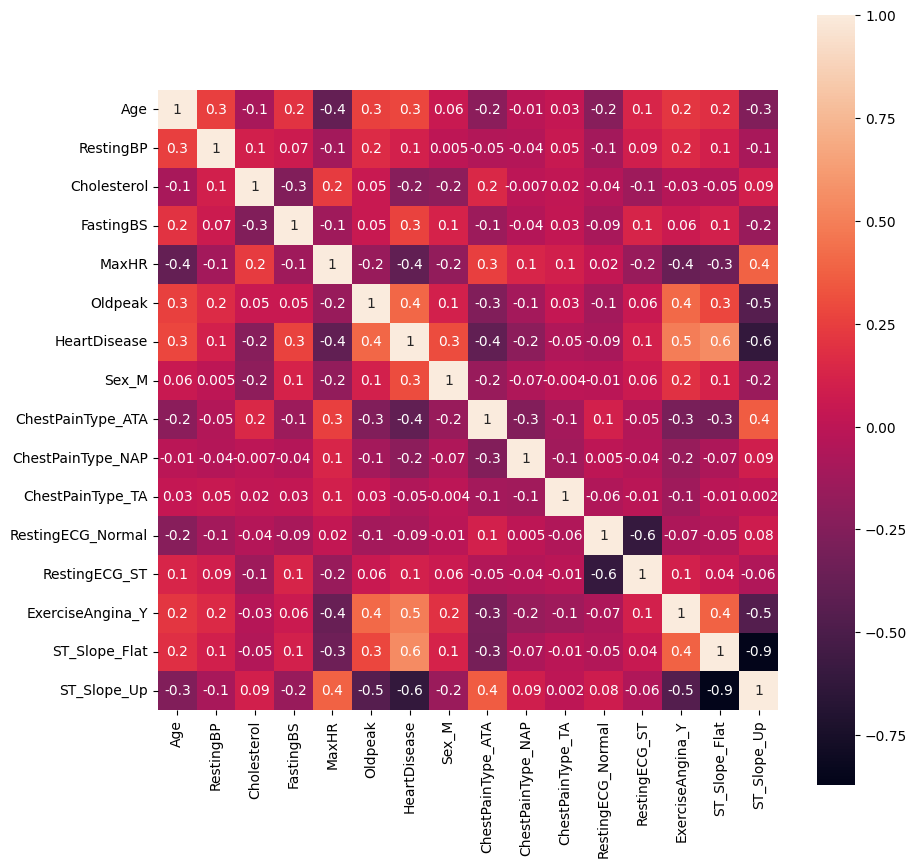

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heart.corr(), annot=True, fmt='.1g', ax=ax, square=True)
plt.show()

In [12]:
numeric = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
scaler.fit(heart[numeric])
heart[numeric] = scaler.transform(heart[numeric])
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,1,0,1,0,0,0,1


In [13]:
heart_train, heart_valid = train_test_split(heart, test_size=0.4, random_state=123)
heart_valid, heart_test = train_test_split(heart_valid, test_size=0.5, random_state=123)

In [14]:
feature_train = heart_train.drop(['HeartDisease'], axis=1)
target_train = heart_train['HeartDisease']

feature_valid = heart_valid.drop(['HeartDisease'], axis=1)
target_valid = heart_valid['HeartDisease']

feature_test = heart_test.drop(['HeartDisease'], axis=1)
target_test  = heart_test['HeartDisease']

In [15]:
model_lr = LogisticRegression(random_state=123, solver='liblinear')
model_lr.fit(feature_train, target_train)
predicted_lr = model_lr.predict(feature_valid)
f1_lr = f1_score(target_valid, predicted_lr)
print('Матрица ошибок:\n', confusion_matrix(target_valid, predicted_lr))
print('F1-мера:', f1_lr)
print("Recall =", recall_score(target_valid, predicted_lr))

Матрица ошибок:
 [[68 15]
 [ 7 94]]
F1-мера: 0.8952380952380953
Recall = 0.9306930693069307


In [19]:
dtrain = xgb.DMatrix(feature_train, label=target_train)
dvalid = xgb.DMatrix(feature_valid, label=target_valid)

In [33]:
param = {
   'max_depth': 5,
   'eta': 0.3,  
   'objective': 'multi:softprob',
   'num_class': 3}
num_round = 20
model_xgb = xgb.train(param, dtrain, num_round)
predicted_xgb = model_xgb.predict(dvalid)
best_preds = np.asarray([np.argmax(line) for line in predicted_xgb])
f1_f = f1_score(target_valid, best_preds)
print("Precision = {}".format(precision_score(target_valid, best_preds, average='macro')))
print("Recall = {}".format(recall_score(target_valid, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(target_valid, best_preds)))
print("Матрица ошибок:\n", confusion_matrix(target_valid, best_preds))
print("F1-мера:", f1_f)

Precision = 0.8873971940009676
Recall = 0.8820827865919123
Accuracy = 0.8858695652173914
Матрица ошибок:
 [[70 13]
 [ 8 93]]
F1-мера: 0.8985507246376812


In [104]:
model_f = RandomForestClassifier(random_state=123, max_depth=10, n_estimators=100)
model_f.fit(feature_train, target_train)
predicted_f = model_f.predict(feature_valid)
f1_f = f1_score(target_valid, predicted_f)
print("Матрица ошибок:\n", confusion_matrix(target_valid, predicted_f))
print("F1-мера:", f1_f)
print("Recall =", recall_score(target_valid, predicted_f))

Матрица ошибок:
 [[66 17]
 [ 7 94]]
F1-мера: 0.8867924528301886
Recall = 0.9306930693069307


test model 

In [105]:
predicted_f_test = model_f.predict(feature_test)
f1 = f1_score(target_test, predicted_f_test)
print("Матрица ошибок:\n", confusion_matrix(target_test, predicted_f_test))
print("F1-мера =", f1)
print("Recall =", recall_score(target_test, predicted_f_test))

Матрица ошибок:
 [[67 13]
 [ 9 95]]
F1-мера = 0.8962264150943395
Recall = 0.9134615384615384


In [35]:
dtest = xgb.DMatrix(feature_test, label=target_test)
predicted_xgb = model_xgb.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in predicted_xgb])
f1_f = f1_score(target_test, best_preds)
print("Precision = {}".format(precision_score(target_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(target_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(target_test, best_preds)))
print("Матрица ошибок:\n", confusion_matrix(target_test, best_preds))
print("F1-мера:", f1_f)

Precision = 0.8615006592352871
Recall = 0.8625
Accuracy = 0.8641304347826086
Матрица ошибок:
 [[68 12]
 [13 91]]
F1-мера: 0.8792270531400966


In [106]:
test = pd.DataFrame({"target": target_test, "predict": predicted_f_test})
test["right"] = test["target"] == test["predict"]
test

,target,predict,right
845,1,1,True
387,1,1,True
580,1,1,True
381,1,1,True
110,0,0,True
...,...,...,...
145,0,0,True
606,1,1,True
795,0,0,True
392,1,1,True
